In [1]:
%matplotlib notebook
from obspy import read
import numpy as np
import sys 
sys.path.append("/Users/Hilary/Documents/Github/Py-NnK/scan")
import os
import EQScanner
import EQ
import importlib
import matplotlib.pyplot as plt
import obspy
import trigger

In [17]:
importlib.reload(EQScanner)

<module 'EQScanner' from '/Users/Hilary/Documents/Github/Py-NnK/scan\\EQScanner.py'>

# Generate test streams with different noise level


In [6]:
# Read a single event (with all the 18 stations)
no_of_event= 20101221012407
#no_of_event= '20110222044937_2'
stm_original = read("/Users/Hilary/Documents/Github/Data/DataIceland/{}/*.sac".format(no_of_event))

In [7]:
# Load Travel Time Model data from file
TTModel_P= np.load('save/Travel_Time_Model_P.npy')
TTModel_S= np.load('save/Travel_Time_Model_S.npy')
src_lalo=[63.90,-22.05]
src_z=6 

In [8]:
for i in range(160,200+1,10):
    no_of_event='P50_p60_S150_p60_N{}'.format(i) # Will be used for saving files.
    # Generate synthetic seismogram
    stm= EQScanner.synthetic_seis( stm=stm_original,  src_lalo=src_lalo, src_z=src_z ,
                        src_lalo_2=None, src_z_2=None , to_2=None,
                        TTModel_P=TTModel_P, TTModel_S=TTModel_S, to=30,
                        P_duration= 3, S_duration= 6, 
                        noise_a=i, 
                        P_duration_2= 3, S_duration_2= 6,  
                        P=[50., 15., 3.**.5], S=[150., 15., 3.**.5],  # High SNR
                        P_pola =60., S_pola= 60., amp_decay=0.01,res= 10000.,
                        save=True, no_of_event=no_of_event)

In [2]:
# Read synthetic stream from disk
no_of_event='P50_p60_S150_p60_N140'
stm = read('save/Test_Stream_{}/{}_Trace_*'.format(no_of_event,no_of_event))

<IPython.core.display.Javascript object>


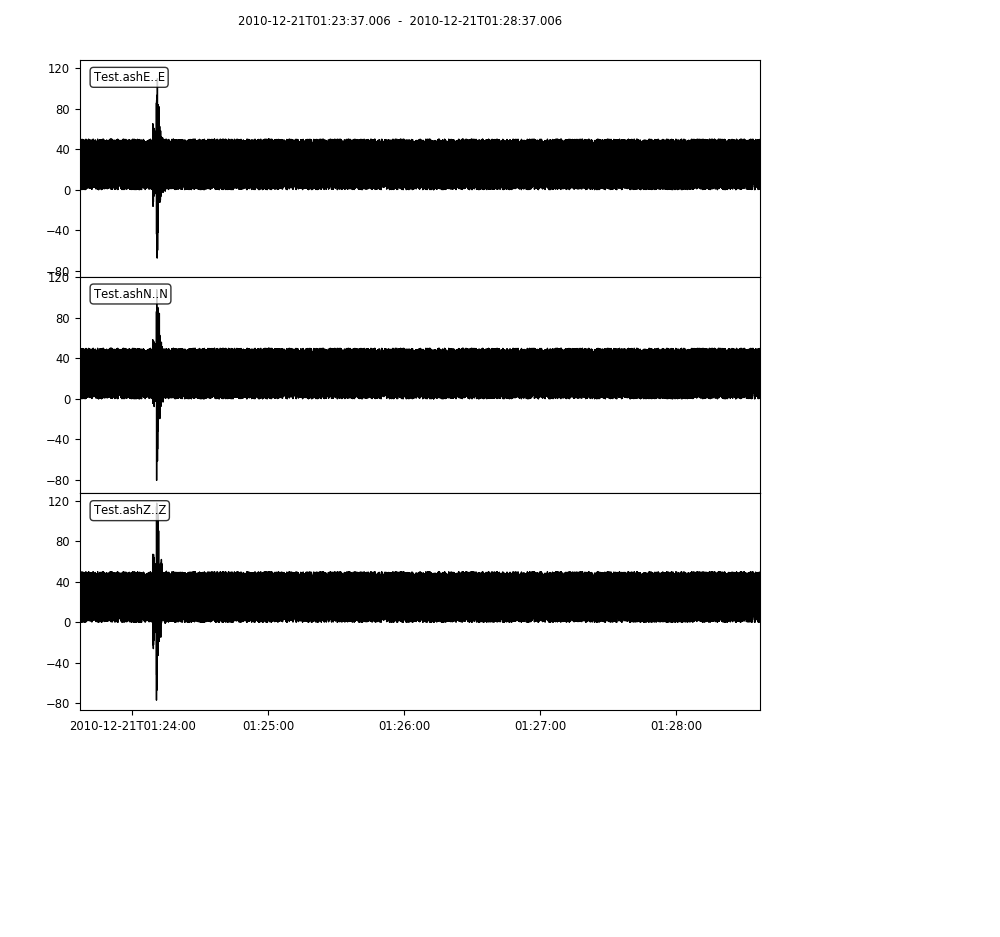

In [69]:
stm[:3].plot()

<IPython.core.display.Javascript object>


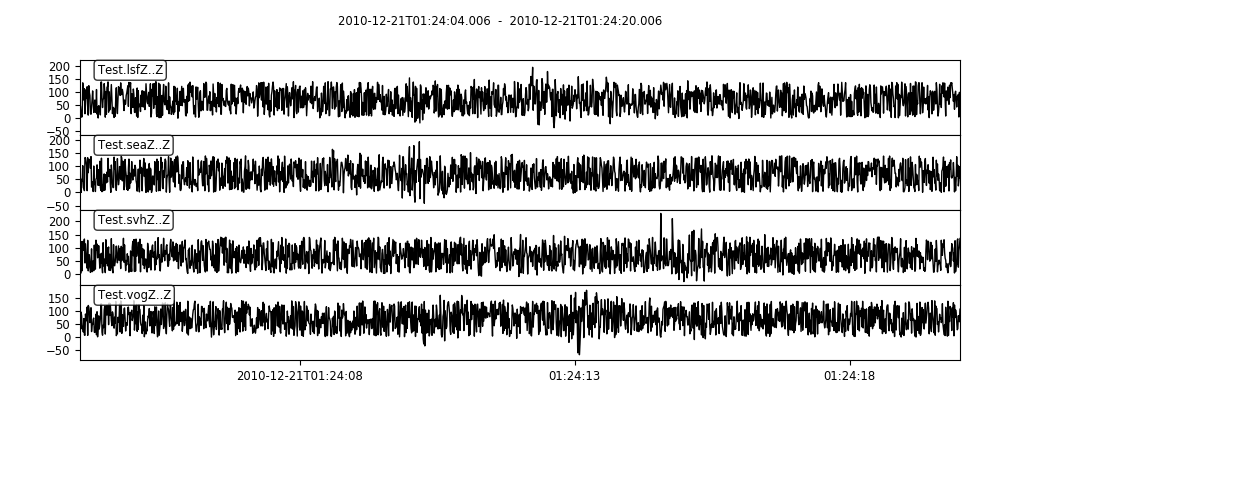

In [5]:
# Process and trim the raw trace
trim_start=27
trim_end= -257
stm_processed=EQScanner.signal_processing(stm=stm[44::3],
                            process=False,hp=5.0,lp=49.0, 
                            trim= True, trim_start= trim_start, trim_end= trim_end, 
                            plot=True, size=(1000, 400))

<IPython.core.display.Javascript object>


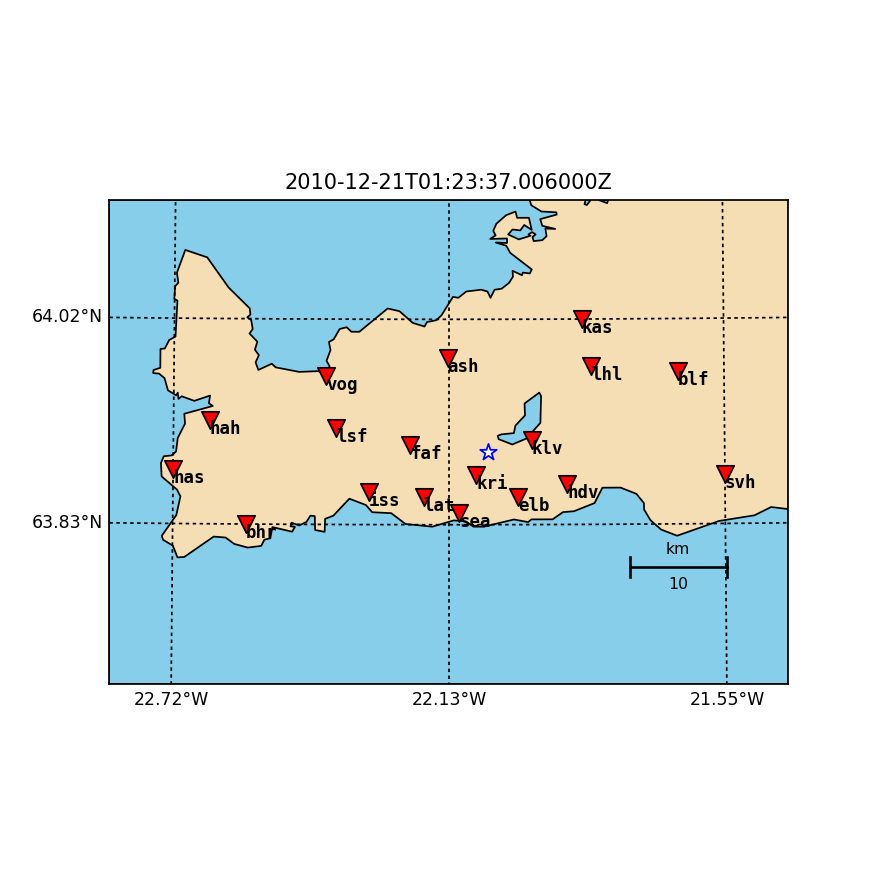

D:\Anaconda2\envs\py36\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
D:\Anaconda2\envs\py36\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


In [83]:
EQScanner.single_st_ev_map(stm, resolution='h', width=70000, height=50000, sca_r=0.1, sca_b=0.04)

# Generate Test Stream with various noise frequency

In [97]:
# Read a single event (with all the 18 stations)
no_of_event= 20101221012407
#no_of_event= '20110222044937_2'
stm_original = read("/Users/Hilary/Documents/Github/Data/DataIceland/{}/*.sac".format(no_of_event))

In [139]:
stm_original[0].stats

         network: SNSN
         station: ashE
        location: 
         channel: E
       starttime: 2010-12-21T01:23:37.006000Z
         endtime: 2010-12-21T01:28:37.006000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 30001
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -68120.72, 'depmax': 40602.36, 'b': 0.0, 'e': 300.0, 'o': 30.0, 't0': 33.8873, 't2': 32.11, 't3': 34.07, 'stla': 63.987083, 'stlo': -22.136028, 'evla': 63.88681, 'evlo': -22.10926, 'evdp': 6.168, 'user1': 1.0, 'dist': 11.254945, 'az': 353.3139, 'baz': 173.28989, 'gcarc': 0.10137802, 'depmen': -3.7473064e-06, 'cmpaz': 90.0, 'cmpinc': 90.0, 'nzyear': 2010, 'nzjday': 355, 'nzhour': 1, 'nzmin': 23, 'nzsec': 37, 'nzmsec': 6, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 30001, 'iftype': 1, 'idep': 5, 'iztype': 10, 'leven': 1, 'lpspol': 0, 'lovrok': 1, 'lcalda': 1, 'kstnm': 'ashE    ', 'ka': 'P', 'kt0': 'S', 'kt2': 'D       ', 'kt3': 'E       ', 'kuser0

In [142]:
stm_original[0].stats.sac.stlo

-22.136028

In [98]:
# Load Travel Time Model data from file
TTModel_P= np.load('save/Travel_Time_Model_P.npy')
TTModel_S= np.load('save/Travel_Time_Model_S.npy')
src_lalo=[63.90,-22.05]
src_z=6 

In [99]:
importlib.reload(EQScanner)

<module 'EQScanner' from '/Users/Hilary/Documents/Github/Py-NnK/scan\\EQScanner.py'>

In [106]:
#Test
n=100
no_of_event='test' # Will be used for saving files.
f=5
# Generate synthetic seismogram
stm= EQScanner.synthetic_seis( stm=stm_original,  src_lalo=src_lalo, src_z=src_z ,
                        src_lalo_2=None, src_z_2=None , to_2=None,
                        TTModel_P=TTModel_P, TTModel_S=TTModel_S, to=30,
                        P_duration= 3, S_duration= 6, 
                        noise_a=100, noise_f=f, noise_fa=5,
                        P_duration_2= 3, S_duration_2= 6,  
                        P=[50., 15., 3.**.5], S=[150., 15., 3.**.5],  # High SNR
                        P_pola =60., S_pola= 60., amp_decay=0.01,res= 10000.,
                        save=False, no_of_event=no_of_event)

<IPython.core.display.Javascript object>


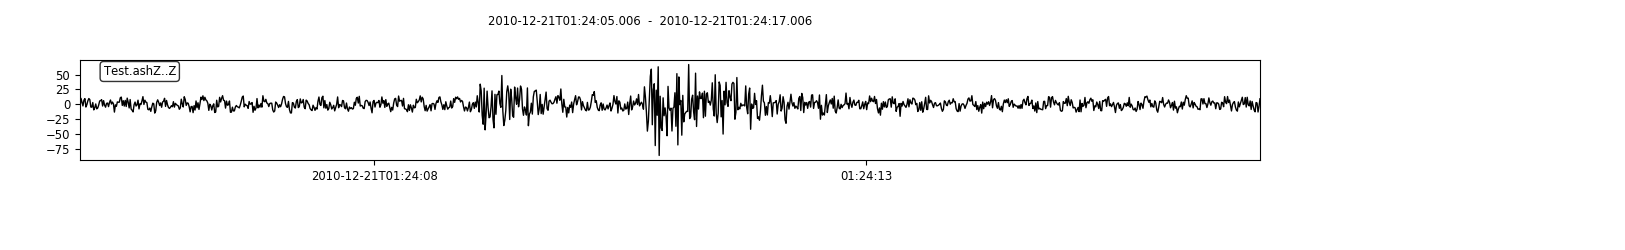

In [138]:
# Process and trim the raw trace
trim_start=28
trim_end= -260
stm_processed=EQScanner.signal_processing(stm=stm[2],#[44::3],
                            process=False,hp=5.0,lp=49.0, 
                            trim= True, trim_start= trim_start, trim_end= trim_end, 
                            plot=True, size=(1300,200))#500))

In [169]:
#for i in [0.2,0.5]:#,2,5,8]:
for f in range(70,100+1,10):
    n=100
    no_of_event='P50_p60_S150_p60_N100_f{}'.format(f)#.format(n,i) # Will be used for saving files.
    # Generate synthetic seismogram
    stm= EQScanner.synthetic_seis( stm=stm_original,  src_lalo=src_lalo, src_z=src_z ,
                        src_lalo_2=None, src_z_2=None , to_2=None,
                        TTModel_P=TTModel_P, TTModel_S=TTModel_S, to=30,
                        P_duration= 3, S_duration= 6, 
                        noise_a=100, noise_f=f, noise_fa=0.2,
                        P_duration_2= 3, S_duration_2= 6,  
                        P=[50., 15., 3.**.5], S=[150., 15., 3.**.5],  # High SNR
                        P_pola =60., S_pola= 60., amp_decay=0.01,res= 10000.,
                        save=True, no_of_event=no_of_event)

In [176]:
no_of_event='P50_p60_S150_p60_N100_f1' # Will be used for saving files.
# Read synthetic steam from disk
stm = read('save/Test_Stream_{}/{}_Trace_*'.format(no_of_event,no_of_event))

<IPython.core.display.Javascript object>


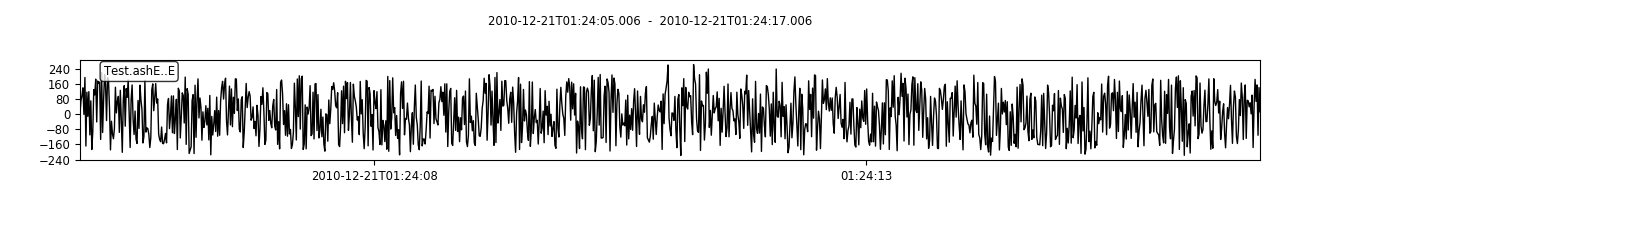

In [178]:
# Process and trim the raw trace
trim_start=28
trim_end= -260
stm_processed=EQScanner.signal_processing(stm=stm[0],#[44::3],
                            process=False,hp=5.0,lp=49.0, 
                            trim= True, trim_start= trim_start, trim_end= trim_end, 
                            plot=True, size=(1300,200))#500))

# Genetate Test stream with Velocity Anomalies

In [17]:
from copy import copy

In [57]:
# Load Travel Time Model data from file
TTModel_P= np.load('save/Travel_Time_Model_P.npy')
TTModel_S= np.load('save/Travel_Time_Model_S.npy')
TTModel_P_slow= np.load('save/Travel_Time_Model_P_P-1.npy')
TTModel_S_slow= np.load('save/Travel_Time_Model_S_(P-1)178.npy')
# Location of synthetic source
src_lalo=[63.90,-22.05]
src_z=6 

In [251]:
TTModel_S[10,30]

9.07

In [252]:
TTModel_S_slow[10,30]

10.844999999999999

In [187]:
0.2/1.78

0.11235955056179776

In [58]:
# Read a single event (with all the 18 stations) (just to get the format!)
no_of_event= 20101221012407
#no_of_event= '20110222044937_2'
stm_original = read("/Users/Hilary/Documents/Github/Data/DataIceland/{}/*.sac".format(no_of_event))

In [59]:
# Generate synthetic seismogram
stm_normal= EQScanner.synthetic_seis( stm=stm_original,  src_lalo=src_lalo, src_z=src_z ,
                    src_lalo_2=None, src_z_2=None , to_2=None,
                    TTModel_P=TTModel_P, TTModel_S=TTModel_S, to=30,
                    P_duration= 3, S_duration= 6, noise_a=10, 
                    P_duration_2= 3, S_duration_2= 6,  
                    P=[50., 15., 3.**.5], S=[150., 15., 3.**.5],  # High SNR
                    P_pola =60., S_pola= 60., amp_decay=0.01,res= 10000.,
                    save=False, no_of_event=no_of_event)
stm_slow= EQScanner.synthetic_seis( stm=stm_original,  src_lalo=src_lalo, src_z=src_z ,
                    src_lalo_2=None, src_z_2=None , to_2=None,
                    TTModel_P=TTModel_P_slow, TTModel_S=TTModel_S_slow, to=30,
                    P_duration= 3, S_duration= 6, noise_a=10, 
                    P_duration_2= 3, S_duration_2= 6,  
                    P=[50., 15., 3.**.5], S=[150., 15., 3.**.5],  # High SNR
                    P_pola =60., S_pola= 60., amp_decay=0.01,res= 10000.,
                    save=False, no_of_event=no_of_event)

<IPython.core.display.Javascript object>


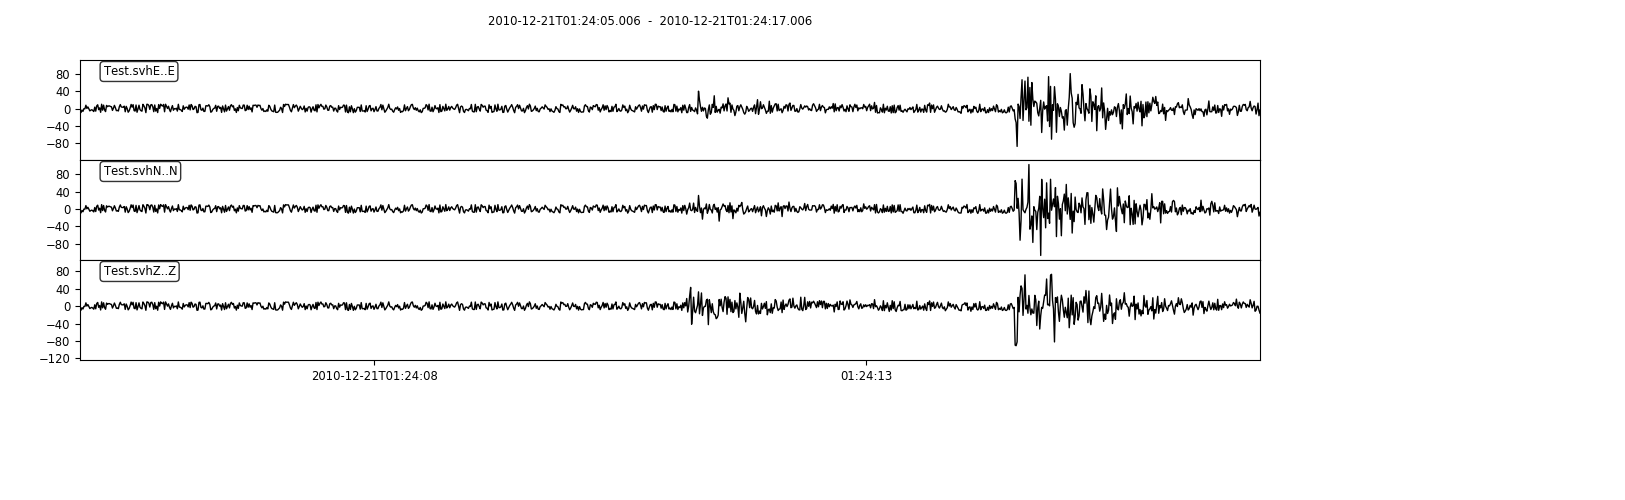

In [63]:
# Process and trim the raw trace (just for visually comparison)
trim_start=28
trim_end= -260
stm_processed=EQScanner.signal_processing(stm=stm_normal[48:51],#[44::3],
                            process=False,hp=5.0,lp=49.0, 
                            trim= True, trim_start= trim_start, trim_end= trim_end, 
                            plot=True, size=(1300,400))#500))

<IPython.core.display.Javascript object>


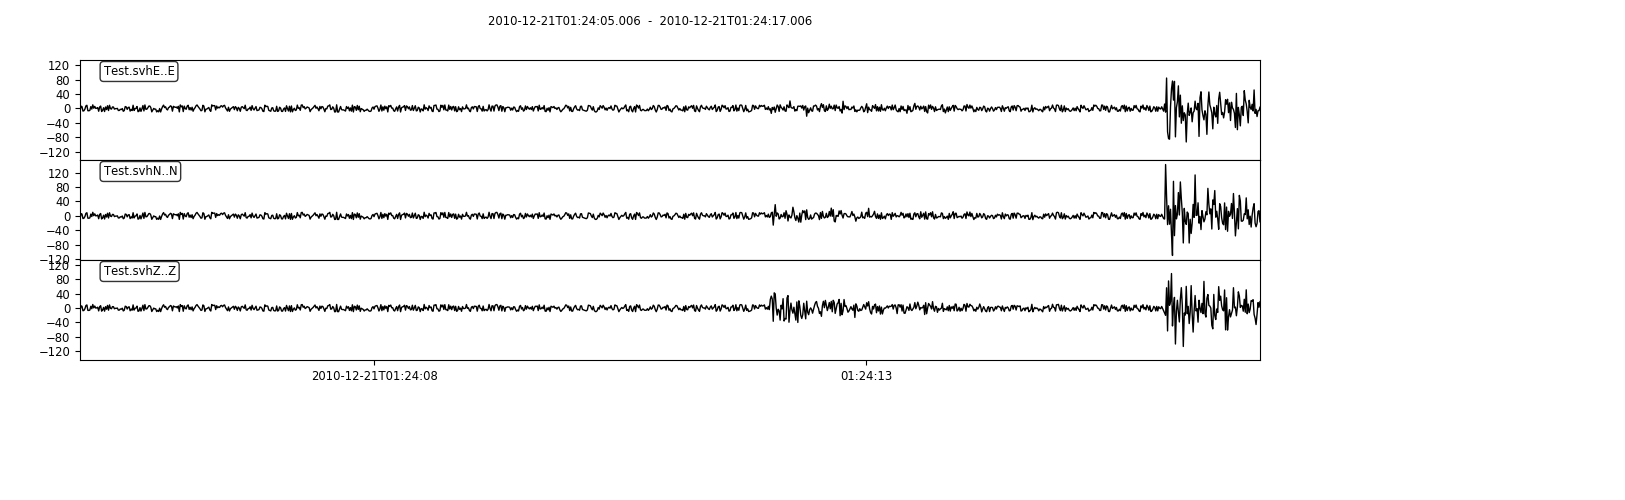

In [65]:
# Process and trim the raw trace (just for visually comparison)
trim_start=28
trim_end= -260
stm_processed=EQScanner.signal_processing(stm=stm_slow[48:51],#[44::3],
                            process=False,hp=5.0,lp=49.0, 
                            trim= True, trim_start= trim_start, trim_end= trim_end, 
                            plot=True, size=(1300,400))#500))

#### Select stations manually

In [271]:
# Substitude data in stations with contaminated data (Please choose how many stations manually)
stm = stm_normal.copy()
for i,tr in enumerate(stm):
    if tr.stats.station[:3] in [ 'svh', 'blf']:#, 
                                #'kas', 'lhl']:#,
                                #'hdv', 'elb']:#, 
                                #'klv','kri']:#,
                                #'sea','ash']:#,
                                #'faf','lat']:#,
                                #'iss','lsf']:#,
                                #'vog','bhr']:#,
                                #'hah','has']:
        stm[i].data=stm_slow[i].data

#### Select stations randomly

In [66]:
import random

In [94]:
# Randomly choose contaminated stations from the station list
no_of_cont_st = 18                          # number of contaminated station
station_list =    [ 'svh', 'blf', 'kas', 'lhl', 'hdv', 'elb', 
                    'klv','kri' , 'sea', 'ash', 'faf', 'lat',
                    'iss','lsf' , 'vog', 'bhr', 'hah', 'has']
st_contaminated = random.sample(station_list, no_of_cont_st) 
st_contaminated

['kas',
 'sea',
 'hdv',
 'lat',
 'hah',
 'bhr',
 'ash',
 'lhl',
 'svh',
 'faf',
 'blf',
 'vog',
 'iss',
 'klv',
 'elb',
 'lsf',
 'kri',
 'has']

In [95]:
# Substitude data in stations with contaminated data (choose stations randomly)
stm = stm_normal.copy()
for i,tr in enumerate(stm):
    if tr.stats.station[:3] in st_contaminated :
        stm[i].data=stm_slow[i].data

#### Save the test stream

In [96]:
# Save the stream (Please change how many stations manually)
no_of_event='Slow_P-1_S(p-1)178_random_n10_'+'{}'.format(no_of_cont_st)+'st'
os.makedirs('save/Test_Stream_{}'.format(no_of_event))
stm.write('save/Test_Stream_{}/{}_Trace_'.format(no_of_event,no_of_event),  format='SAC')

In [179]:
stm_normal

NameError: name 'stm_normal' is not defined